# Imports + settings

In [1]:
import os
os.chdir("../..")  # Move one level up  
print(os.getcwd())

/Users/malthepabst/Documents/GitHub/Thesis_Neurodiversity


In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [140]:
#Key = filename, value = {id: str, run: int, dataset: str, diagnosis: str, network: nx.graph}
network_dict = {}

file_list = [f for f in os.listdir('data.nosync/networks_multi') if '.gml' in f ]
for i in file_list:
    info = i.split('_')
    network_dict[i] = {'id': info[0],
                       'run': info[1],
                       'dataset': info[2],
                       'diagnosis': info[3],
                       'network': nx.read_gml(f'data.nosync/networks_multi/{i}')}

# Basic network stats

All of the networks has 17 nodes, with 816 edges. Such that each of the nodes has five edges to each of the other nodes (one per feature).

In [24]:
participant = network_dict['1320247_run-1_ADHD200_TD_17.gml']
print(f"Number of nodes {participant['network'].number_of_nodes()}")
print(f"Number of edges {participant['network'].number_of_edges()}")

Number of nodes 17
Number of edges 816


## Node features

In [45]:
features = [f"feature_{i+1}" for i in range(16)]

In [54]:
node_features = []

for key, value in network_dict.items():
    network = value['network']
    participant_node_features = nx.get_node_attributes(network, 'node_features')
    for n, f in participant_node_features.items():
        node_features.append([n] + [value['diagnosis']] + f)
node_features = pd.DataFrame(node_features, columns=['Node', 'Diagnosis']+features)

In [102]:
node_features.isna().sum()

Node          0
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
dtype: int64

### PCA Plot

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(node_features[features])
print(pca.explained_variance_ratio_)

[0.69610855 0.06421324]


In [72]:
pca_data = pd.DataFrame(pca.transform(node_features[features]), columns= ['PCA_1', "PCA_2"])
pca_data[['Node', 'Diagnosis']] = node_features[['Node', 'Diagnosis']]

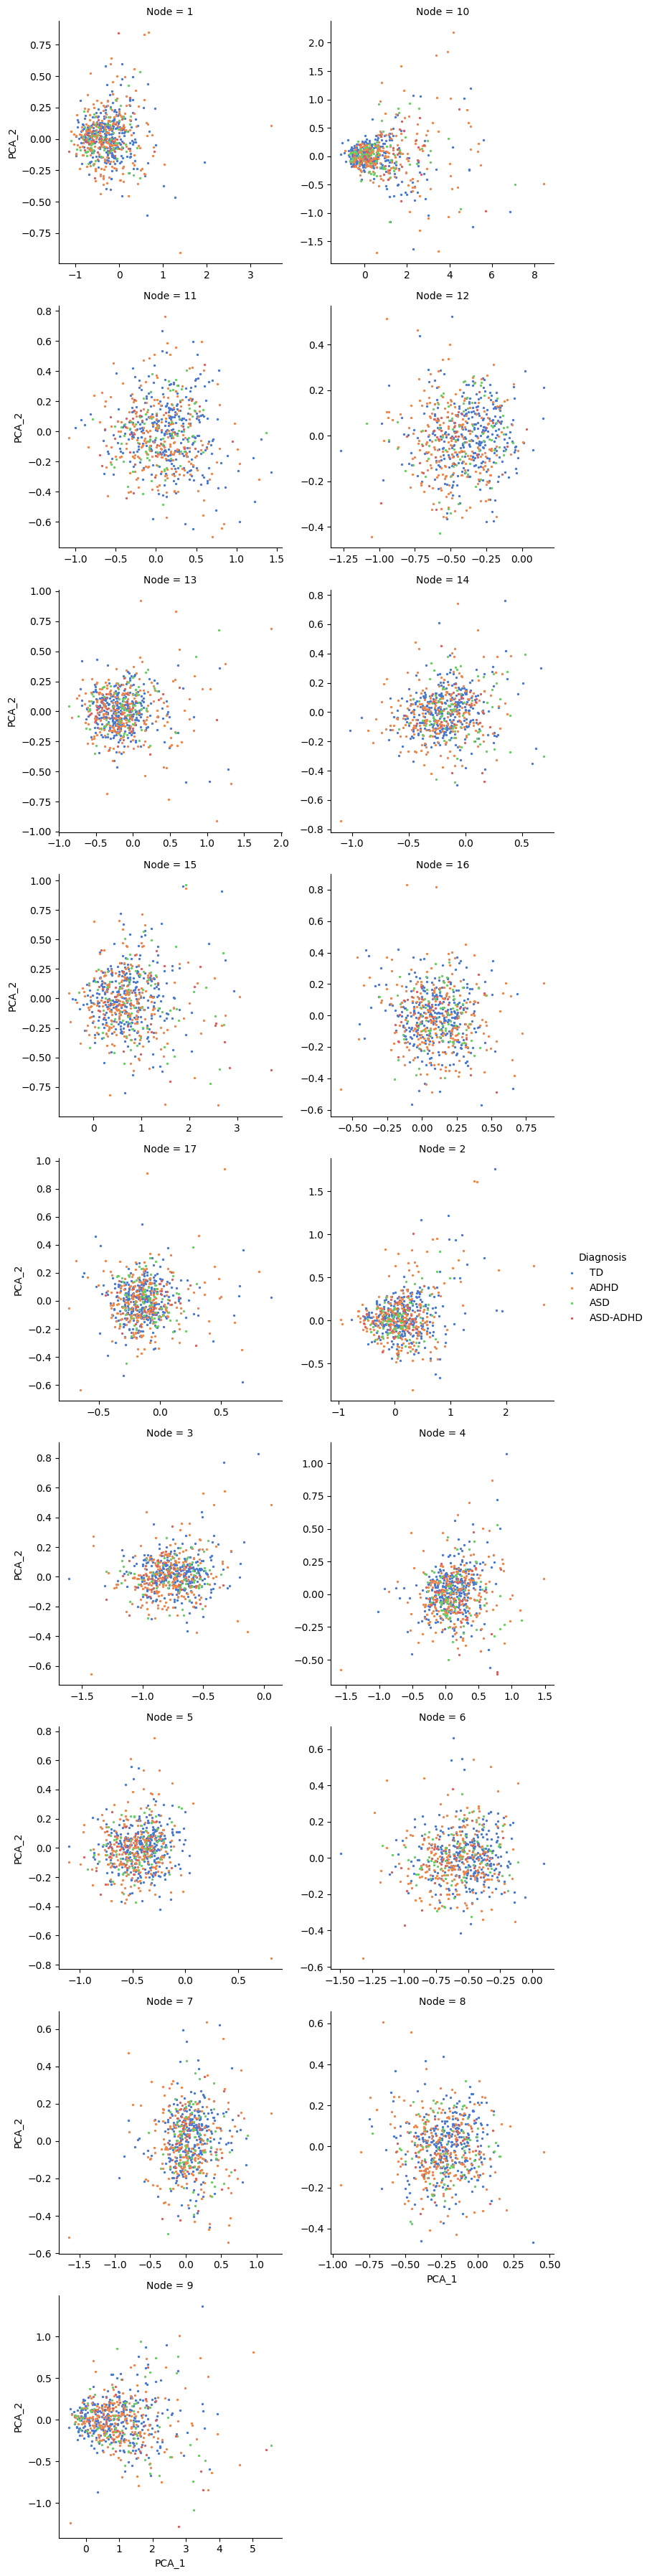

In [89]:
sns.lmplot(
    data=pca_data, 
    x="PCA_1", 
    y="PCA_2", 
    col="Node", 
    hue="Diagnosis",
    col_wrap=2, 
    palette="muted", 
    fit_reg = False,
    height=4, 
    scatter_kws={"s": 2, "alpha": 1}, 
    facet_kws={"sharex": False, "sharey": False}
)

### T-SNE Plot

In [97]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=7, random_state=42).fit_transform(node_features[features])

tsne_data = pd.DataFrame(X_embedded, columns= ['TSNE_1', "TSNE_2"])
tsne_data[['Node', 'Diagnosis']] = node_features[['Node', 'Diagnosis']]

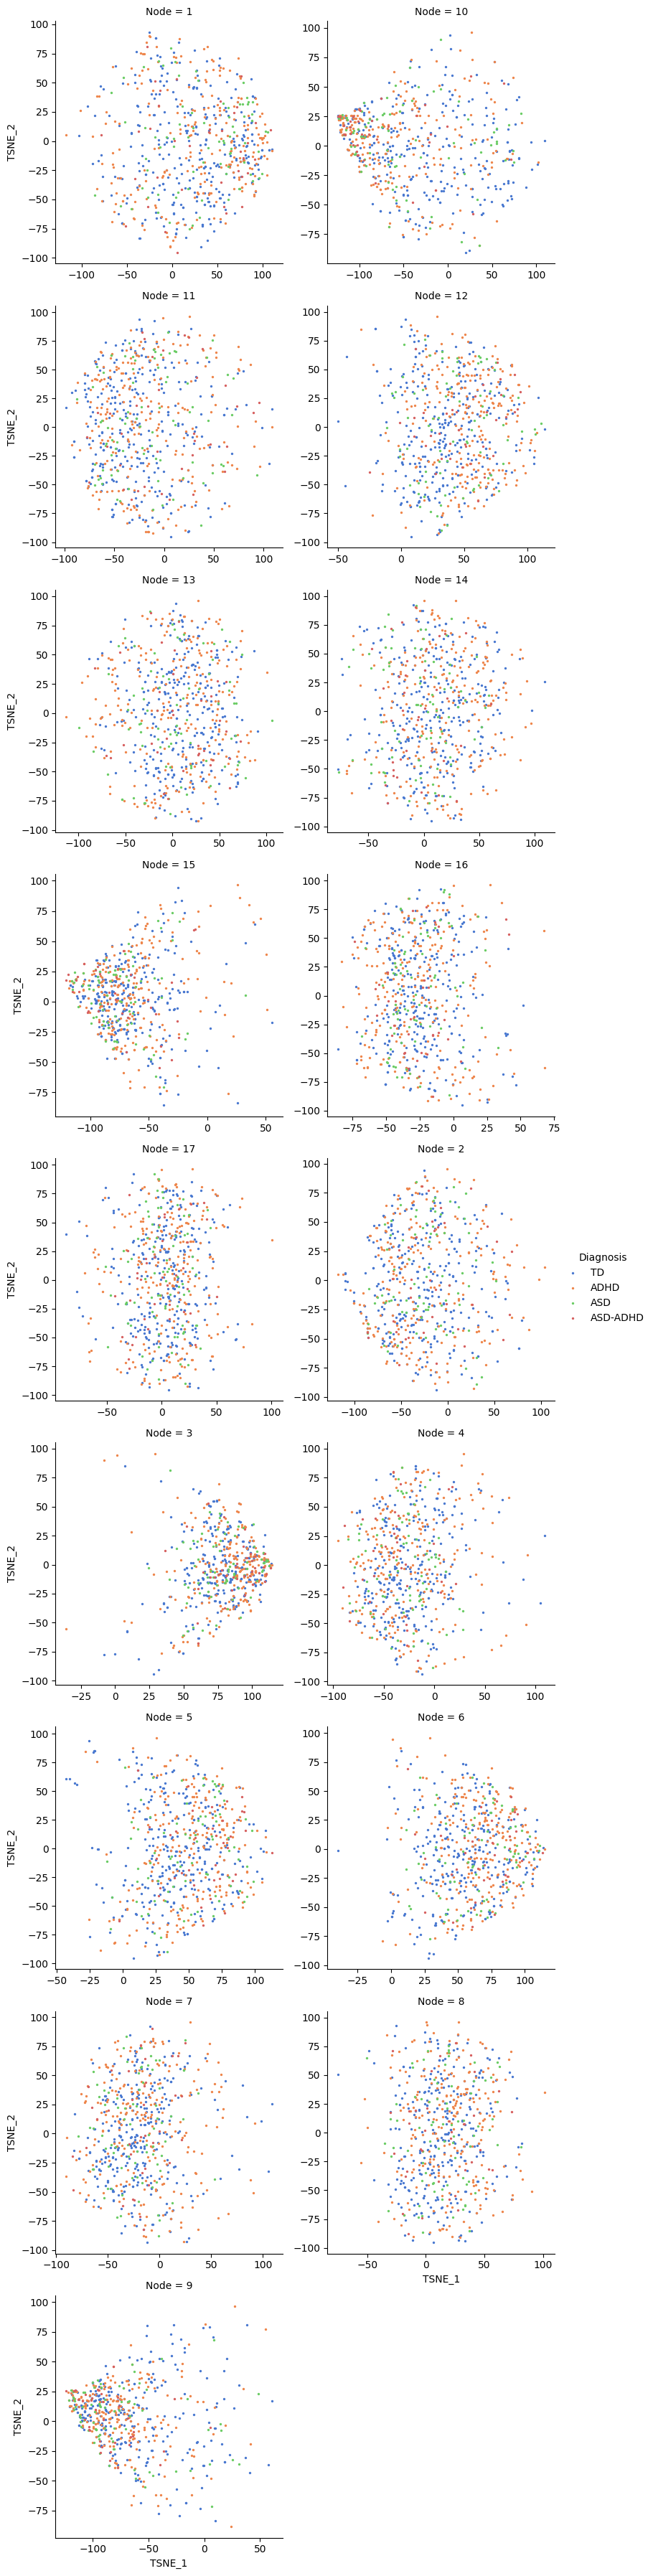

In [98]:
sns.lmplot(
    data=tsne_data, 
    x="TSNE_1", 
    y="TSNE_2", 
    col="Node", 
    hue="Diagnosis",
    col_wrap=2, 
    palette="muted", 
    fit_reg = False,
    height=4, 
    scatter_kws={"s": 2, "alpha": 1}, 
    facet_kws={"sharex": False, "sharey": False}
)

## Edge features

In [119]:
edge_features = []

for key, value in network_dict.items():
    network = value['network']
    edge_pairs = []
    for u in range(17):
        for v in range(17):
            if u != v and [u, v] not in edge_pairs:
                edge_pairs.append([u, v])
                pair_data = [str(u+1), str(v+1), value['diagnosis']]
                for e in range(6):
                    pair_data.append(network[str(u+1)][str(v+1)][e]['edge_features'])
                edge_features.append(pair_data)
edge_features = pd.DataFrame(edge_features, columns=['v', 'v', 'Diagnosis']+['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6'])

In [123]:
edge_features.isna().sum()

v                0
v                0
Diagnosis        0
Feature_1        0
Feature_2        0
Feature_3        0
Feature_4        0
Feature_5    11424
Feature_6    11424
dtype: int64

### Get degree distribution, when removing nan and negative weighted edges

In [143]:
less_e_network_dict = {}
for key, value in network_dict.items():
    network = value['network'].copy()
    to_remove = []
    for e in network.edges:
        edge_feature = network[e[0]][e[1]][e[2]]['edge_features']
        if str(edge_feature) == 'nan' or edge_feature < 0:
            to_remove.append(e)
    print(f"Removing {len(to_remove)} edges out of {network.number_of_edges()}")
    for i in to_remove:
        network.remove_edge(*i)
    new_values = value.copy()
    new_values['network'] = network
    less_e_network_dict[key] = new_values

Removing 355 edges out of 816
Removing 289 edges out of 816
Removing 419 edges out of 816
Removing 289 edges out of 816
Removing 241 edges out of 816
Removing 256 edges out of 816
Removing 268 edges out of 816
Removing 207 edges out of 816
Removing 293 edges out of 816
Removing 347 edges out of 816
Removing 253 edges out of 816
Removing 240 edges out of 816
Removing 153 edges out of 816
Removing 314 edges out of 816
Removing 218 edges out of 816
Removing 254 edges out of 816
Removing 201 edges out of 816
Removing 210 edges out of 816
Removing 266 edges out of 816
Removing 227 edges out of 816
Removing 222 edges out of 816
Removing 217 edges out of 816
Removing 248 edges out of 816
Removing 282 edges out of 816
Removing 219 edges out of 816
Removing 341 edges out of 816
Removing 262 edges out of 816
Removing 263 edges out of 816
Removing 285 edges out of 816
Removing 220 edges out of 816
Removing 241 edges out of 816
Removing 234 edges out of 816
Removing 203 edges out of 816
Removing 2

In [ ]:
dia_degrees = {}
for key, value in less_e_network_dict.items():
    if value['diagnosis'] not in dia_degrees.keys():
        dia_degrees[value['diagnosis']] = []
    network = value['network'].copy()
    dia_degrees[value['diagnosis']] = dia_degrees[value['diagnosis']] + sorted((d for n, d in network.degree()), reverse=True)    

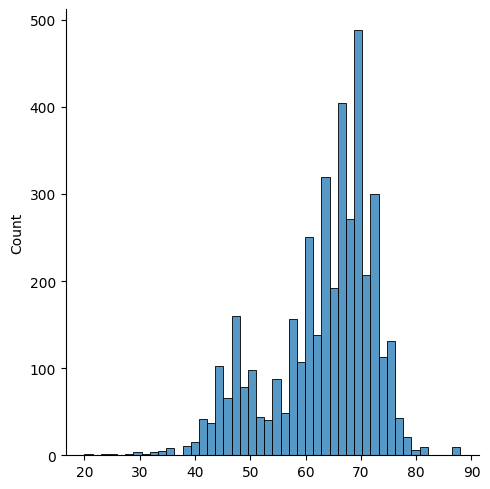

In [176]:
sns.displot(dia_degrees['ADHD'])

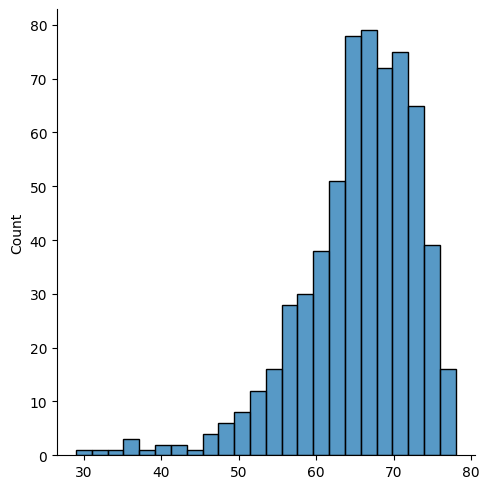

In [177]:
sns.displot(dia_degrees['ASD-ADHD'])

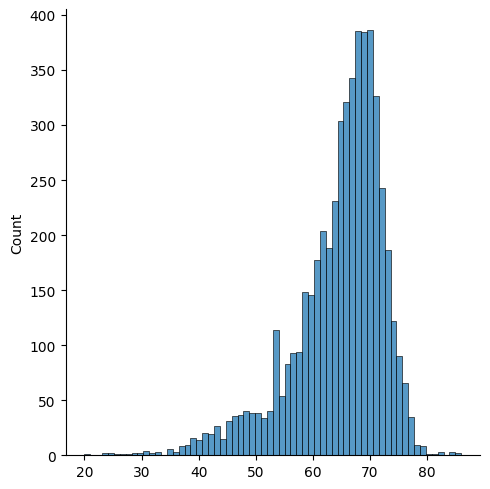

In [175]:
sns.displot(dia_degrees['TD'])

In [161]:
sns.barplot(*np.unique(dia_degrees['TD'], return_counts=True))


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given